In [1]:
import numpy as np
import sympy
import sympy.stats

from matplotlib import pyplot as plt

import common

In [2]:
t1_sym = sympy.symbols(r't_{1}', real=True)
tstar_sym = sympy.symbols(r't^{\star}', real=True)
c1,c2,c3,c4 = sympy.symbols(r'c_{1} c_{2} c_{3} c_{4}', real=True, nonnegative=True)
d1,d2,d3,d4 = sympy.symbols(r'd_{1} d_{2} d_{3} d_{4}', real=True)

In [3]:
loss_expr = (
    c1*(t1_sym-d1)**4
    +
    c2*(t1_sym-d2)**2
)
display(loss_expr)

grad_loss = loss_expr.diff(t1_sym)
display(grad_loss)

grad_loss_func = sympy.lambdify(t1_sym, grad_loss)

hessian = grad_loss.diff(t1_sym)

display(hessian)

c_{1}*(-d_{1} + t_{1})**4 + c_{2}*(-d_{2} + t_{1})**2

4*c_{1}*(-d_{1} + t_{1})**3 + c_{2}*(-2*d_{2} + 2*t_{1})

12*c_{1}*(-d_{1} + t_{1})**2 + 2*c_{2}

In [4]:
specific_subs = {
    c1:1,
    # c2:1,
    c2:0,
    d1:1,
    # d2:-1,
    d2:0,
}

In [5]:
specific_loss = loss_expr.subs(specific_subs)
display(specific_loss)

specific_grad_loss = grad_loss.subs(specific_subs)
display(specific_grad_loss)

(t_{1} - 1)**4

4*(t_{1} - 1)**3

In [6]:
hessian.subs(specific_subs)

12*(t_{1} - 1)**2

In [7]:
sols = sympy.solve(specific_grad_loss,t1_sym)

sols = [
    sol
    for sol in sols
    if sympy.Eq(sympy.im(sol), 0)
]

display(*sols)

1

In [8]:
(_, theta_star) =min([
    (specific_loss.subs(t1_sym, sol), sol)
    for sol in sols
])

display(theta_star)

theta_star = float(theta_star)

print(theta_star)

1

1.0


In [9]:
grad_loss_func = sympy.lambdify(t1_sym, specific_grad_loss)

In [10]:
num_iteration=300
num_realizations=1_000

In [11]:
noise_dist = sympy.stats.Normal(
    r'\epsilon',
    mean=0,
    std=0.01,
)

In [12]:
theta_data = [
    common.basic_root_finding(
        noisy_grad_loss_func=common.make_func_with_additive_noise(
            func=grad_loss_func,
            noise_dist=noise_dist,
        ),
        a_k_func=lambda k_index: 1/(k_index+1+100)**(0.501),
        random_state=np.random.RandomState(seed=r_index),
        num_iteration=num_iteration,
        theta_0=np.matrix([theta_star]),
    )
    for r_index in range(num_realizations)
]

Mean Theta N Error     : 0.009141222415925984
Mean Theta Bar N Error : 0.006366954120888206
Mean Theta N Bar Error < Mean Theta N Error: True


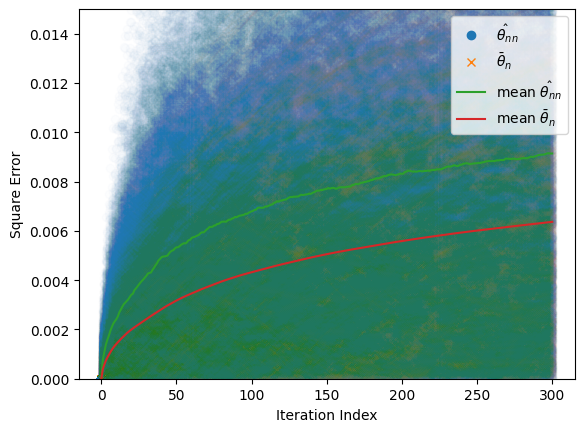

In [13]:
fig1, ax1 = common.plot_error_data(
    theta_data,
    theta_star,
    ylim=[0,0.015],
)

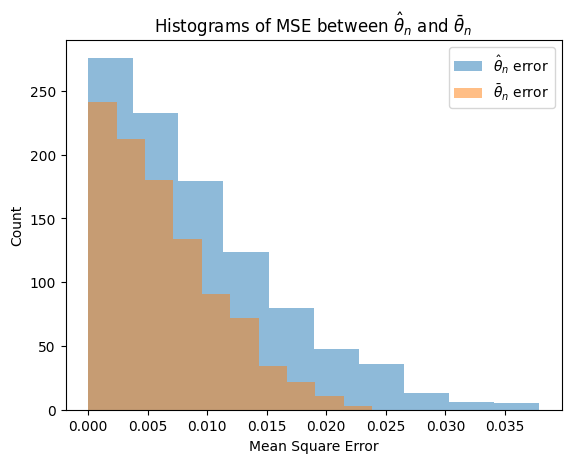

In [14]:
fig2, ax2 = common.plot_error_histogram(
    theta_data,
    theta_star,
)